# APPLE STOCK PRICE PREDICTION USING LSTM

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import pandas_datareader as web 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM

C:\Users\HPG3\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
df3 = pd.read_csv('apple_stock_prices.csv')
df3

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...,...
3014,2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
3015,2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
3016,2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL
3017,2017-12-28,171.00,171.85,170.48,171.08,16480187,AAPL


In [3]:
df3.shape

(3019, 7)

Text(0, 0.5, 'Close Pice USD')

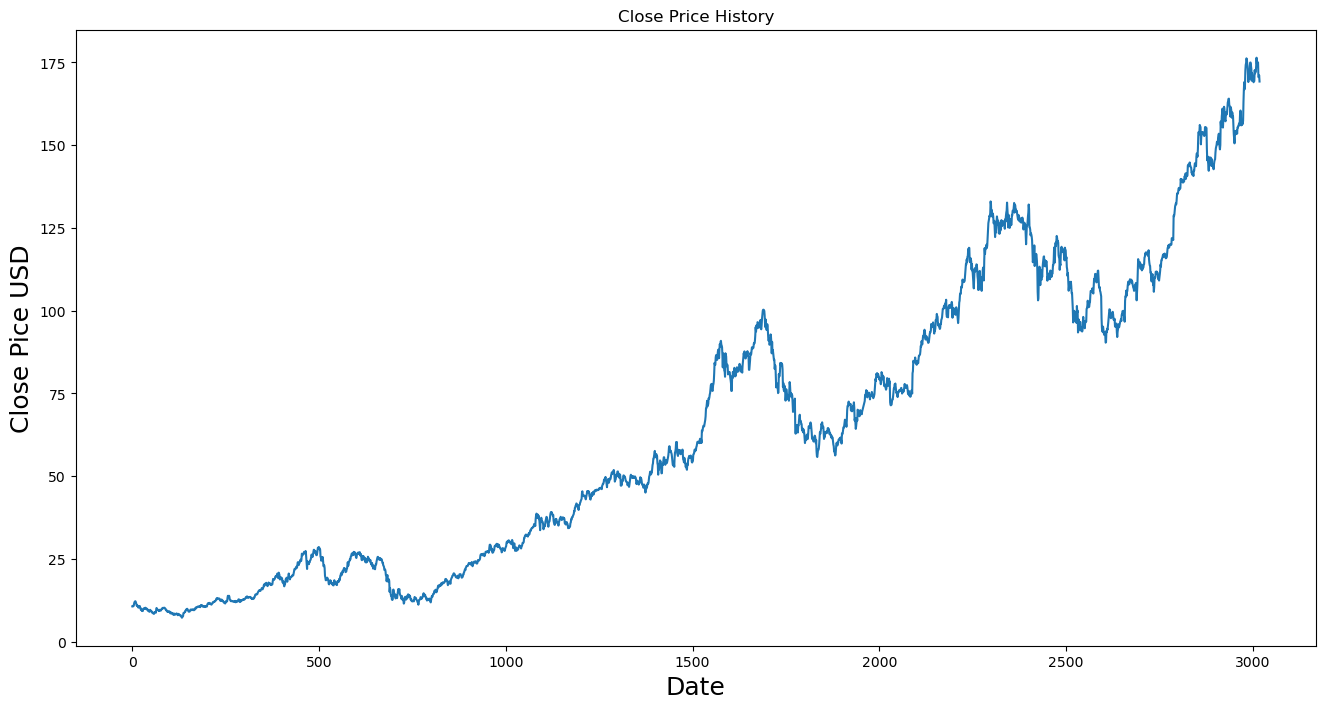

In [4]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df3['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Pice USD', fontsize= 18)

In [5]:
#creating new dataframe with only cose column
data = df3.filter(['Close'])
#converting to numpy array
dataset = data.values 

In [6]:
# training dataset
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

2416

In [7]:
#scaling the data 
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data 

array([[0.02033337],
       [0.0205107 ],
       [0.02003783],
       ...,
       [0.96559877],
       [0.96843599],
       [0.95750089]], shape=(3019, 1))

In [8]:
#creating training dataset
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.02033337, 0.0205107 , 0.02003783, 0.02163376, 0.02139733,
       0.02547582, 0.0280766 , 0.02837215, 0.02949521, 0.0287268 ,
       0.02683532, 0.023939  , 0.02145644, 0.02281594, 0.02139733,
       0.0198605 , 0.01826457, 0.01802814, 0.0205107 , 0.02098357,
       0.02086535, 0.01808724, 0.01785081, 0.01400875, 0.01430429,
       0.01530914, 0.01205816, 0.01406786, 0.01182173, 0.01430429,
       0.01566379, 0.01678685, 0.01655042, 0.01554557, 0.01743705,
       0.0177917 , 0.01755527, 0.01714151, 0.01501359, 0.01554557,
       0.01595933, 0.0143634 , 0.01247192, 0.01318123, 0.01264925,
       0.01117153, 0.01058045, 0.01264925, 0.01406786, 0.01312212,
       0.01152619, 0.01182173, 0.01123064, 0.00939827, 0.00928006,
       0.00797967, 0.00786145, 0.00744769, 0.00679749, 0.00981203])]
[np.float64(0.010166686369547227)]

[array([0.02033337, 0.0205107 , 0.02003783, 0.02163376, 0.02139733,
       0.02547582, 0.0280766 , 0.02837215, 0.02949521, 0.0287268 ,
       0.02683532, 0.0

In [9]:
# converting x_train, y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
# reshaping tp 3d for the LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2356, 60, 1)

In [11]:
# bUilding lstm model
model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))


C:\Users\HPG3\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#Compiling the model 
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.001), metrics = ['mean_absolute_error'])  

In [13]:
# training the model 
model.fit(x_train, y_train, batch_size = 1, epochs = 10)

Epoch 1/10
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 52s 20ms/step - loss: 7.2034e-04 - mean_absolute_error: 0.0171
Epoch 2/10
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 84s 21ms/step - loss: 2.5373e-04 - mean_absolute_error: 0.0117
Epoch 3/10
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 51s 21ms/step - loss: 2.5209e-04 - mean_absolute_error: 0.0107
Epoch 4/10
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 56s 24ms/step - loss: 1.6231e-04 - mean_absolute_error: 0.0092
Epoch 5/10
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 50s 21ms/step - loss: 1.5458e-04 - mean_absolute_error: 0.0090
Epoch 6/10
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 83s 22ms/step - loss: 1.2499e-04 - mean_absolute_error: 0.0081
Epoch 7/10
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - loss: 1.2606e-04 - mean_absolute_error: 0.0082
Epoch 8/10
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 77s 21ms/step - loss: 1.1464e-04 - mean_absolute_error: 0.0078
Epoch 9/10
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 51s 22ms/step - loss: 1.2935e-04 - mean_absolute_error: 0.0083
Epoch 10/10
2356/2356 ━━━━━━━━━━━━━━━━━━━━ 83s 22ms/ste

In [14]:
# creating the testing dataset 
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [15]:
x_test

[array([0.71834732, 0.72674075, 0.72603145, 0.72597234, 0.73383379,
        0.74063128, 0.72337156, 0.73767585, 0.73613902, 0.72727273,
        0.72880955, 0.72538125, 0.72632699, 0.72183473, 0.71763802,
        0.71261378, 0.71036766, 0.71899752, 0.71728337, 0.70888994,
        0.70741222, 0.71143161, 0.70965835, 0.71308665, 0.70552075,
        0.71149072, 0.70806242, 0.71444615, 0.71084052, 0.70640738,
        0.69328526, 0.69854593, 0.70552075, 0.70457501, 0.70197423,
        0.70014186, 0.68169996, 0.6669228 , 0.68589668, 0.69996453,
        0.69966899, 0.70682114, 0.7168105 , 0.72337156, 0.73785317,
        0.73005083, 0.69736375, 0.6970091 , 0.69310793, 0.68288214,
        0.68648776, 0.68418253, 0.68051779, 0.67419317, 0.6572881 ,
        0.63482681, 0.63931907, 0.63772314, 0.64002837, 0.664854  ]),
 array([0.72674075, 0.72603145, 0.72597234, 0.73383379, 0.74063128,
        0.72337156, 0.73767585, 0.73613902, 0.72727273, 0.72880955,
        0.72538125, 0.72632699, 0.72183473, 0.

In [16]:
#converting the data into a numpy array 
x_test = np.array(x_test)
#reshaping the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
x_test.shape

(603, 60, 1)

In [18]:
# testing the model 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step 


In [19]:
# evaluation of model
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

np.float64(1.8934917372771558)

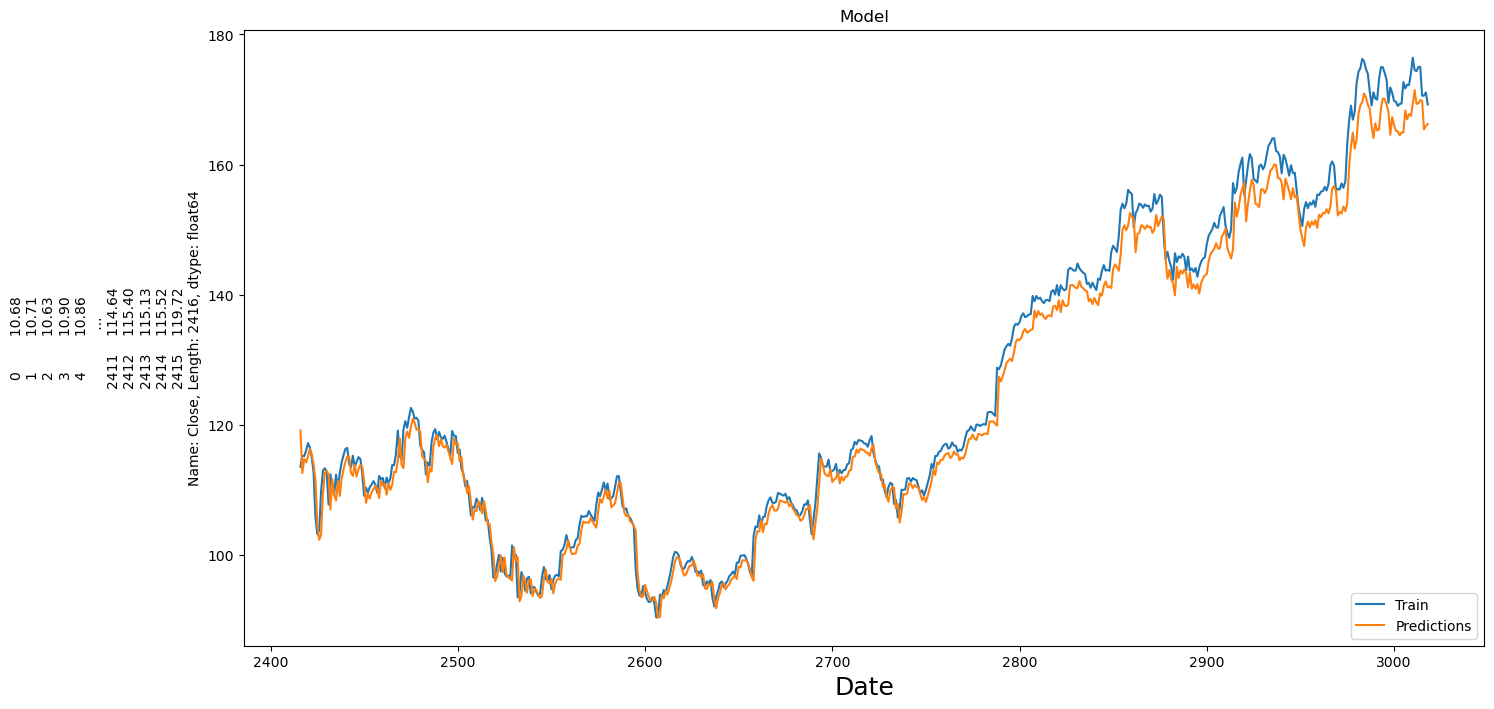

In [20]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid = valid.copy() 
valid['Predictions'] = predictions 

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Predictions', 'val'], loc = 'lower right')
plt.show()

In [21]:
valid

,Close,Predictions
2416,113.49,119.102303
2417,115.24,112.554909
2418,115.15,114.698105
2419,115.96,114.208282
2420,117.16,115.104820
...,...,...
3014,175.01,169.891205
3015,170.57,169.821121
3016,170.60,165.399963
3017,171.08,165.932159


In [38]:
# testing the model with more data 
import yfinance as yf

# Get Apple data
apple = yf.download('AAPL', start='2019-12-17', end='2025-12-25')
new_df = apple[['Close']]


last_60_days = new_df[-60:].values
#scaling the data to values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

xt_test = []
xt_test.append(last_60_days_scaled)
xt_test = np.array(xt_test)
xt_test = np.reshape(xt_test, (xt_test.shape[0], xt_test.shape[1], 1))
pred_price = model.predict(xt_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[253.37784]]


In [47]:
apple2 = yf.download('AAPL', start='2025-12-26')
print(apple2['Close'])

[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2025-12-26  273.399994
2025-12-29  273.760010
2025-12-30  273.079987
2025-12-31  271.859985
2026-01-02  271.010010
2026-01-05  267.260010
2026-01-06  262.359985
2026-01-07  260.329987
2026-01-08  259.040009
2026-01-09  259.369995
2026-01-12  260.250000


In [40]:
import yfinance as yf

# Get all available data
apple = yf.download('AAPL', period='max')
print(f"Latest date available: {apple.index[-1]}")
print(f"Shape: {apple.shape}")
print("\nLast 10 dates:")
print(apple.tail(10).index)

[*********************100%***********************]  1 of 1 completed

Latest date available: 2026-01-12 00:00:00
Shape: (11362, 5)

Last 10 dates:
DatetimeIndex(['2025-12-29', '2025-12-30', '2025-12-31', '2026-01-02',
               '2026-01-05', '2026-01-06', '2026-01-07', '2026-01-08',
               '2026-01-09', '2026-01-12'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [45]:
apple = yf.download('AAPL', start='2019-12-17', end='2025-12-03')
new_df = apple[['Close']]
print(new_df)

[*********************100%***********************]  1 of 1 completed

Price            Close
Ticker            AAPL
Date                  
2019-12-17   67.657143
2019-12-18   67.495476
2019-12-19   67.563049
2019-12-20   67.423119
2019-12-23   68.523338
...                ...
2025-11-25  276.970001
2025-11-26  277.549988
2025-11-28  278.850006
2025-12-01  283.100006
2025-12-02  286.190002

[1498 rows x 1 columns]


In [46]:
apple = yf.download('AAPL', period='max')

[*********************100%***********************]  1 of 1 completed
